Importer les libs necessaires 

In [47]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1- Récuperation du Data   : 


Récuperation des données à travers API sous format json

In [48]:
response=requests.get('https://opendata.paris.fr/api/records/1.0/search/?dataset=chantiers-perturbants&q=&rows=156').json()['records']

Affichage des données  recuperés

In [49]:
response

[{'datasetid': 'chantiers-perturbants',
  'recordid': 'b5d6ea5c7ec4be97921d7f80c0a9dd678fe9ac2a',
  'fields': {'date_fin': '2022-06-07',
   'date_debut': '2022-05-16',
   'niveau_perturbation': 2,
   'typologie': 1,
   'voie': 'bd St Germain',
   'maitre_ouvrage': 'STV',
   'statut': 2,
   'identifiant': 'CP002311',
   'impact_circulation_detail': 'Neutralisation du couloir Bus',
   'impact_circulation': 'RESTREINTE',
   'geo_shape': {'coordinates': [[[[2.347544935724324, 48.850247954285635],
       [2.347618204184758, 48.85028077022366],
       [2.347887656219972, 48.8502144213357],
       [2.347859245670001, 48.85017976356299],
       [2.347588005869028, 48.85024491189155],
       [2.347544935724324, 48.850247954285635]]],
     [[[2.347541090690424, 48.850248225608816],
       [2.347544935724324, 48.850247954285635],
       [2.347542908403282, 48.8502470456722],
       [2.347541090690424, 48.850248225608816]]]],
    'type': 'MultiPolygon'},
   'objet': 'REFECTION_CHAUSSEE',
   'preci

# 2- Data Understanding  : 

Prépartion  pour transformer json en dataFrame 

In [50]:
listrec =[]
for d in response:  
    listrec.append(d['fields'])
print(listrec)

[{'date_fin': '2022-06-07', 'date_debut': '2022-05-16', 'niveau_perturbation': 2, 'typologie': 1, 'voie': 'bd St Germain', 'maitre_ouvrage': 'STV', 'statut': 2, 'identifiant': 'CP002311', 'impact_circulation_detail': 'Neutralisation du couloir Bus', 'impact_circulation': 'RESTREINTE', 'geo_shape': {'coordinates': [[[[2.347544935724324, 48.850247954285635], [2.347618204184758, 48.85028077022366], [2.347887656219972, 48.8502144213357], [2.347859245670001, 48.85017976356299], [2.347588005869028, 48.85024491189155], [2.347544935724324, 48.850247954285635]]], [[[2.347541090690424, 48.850248225608816], [2.347544935724324, 48.850247954285635], [2.347542908403282, 48.8502470456722], [2.347541090690424, 48.850248225608816]]]], 'type': 'MultiPolygon'}, 'objet': 'REFECTION_CHAUSSEE', 'precision_localisation': 'Au 51', 'cp_arrondissement': '75005', 'description': "Remise en état de la voirie suite à l'incendie du Bus", 'geo_point_2d': [48.850232020108585, 2.347727130410587]}, {'date_fin': '2022-08

- Donnée contenant l'ensemble des chantiers perturbants de la Ville de Paris. 

- Donnée surfacique décrivant l'ensemble des chantiers perturbants de la ville de Paris.

- Les chantiers perturbants sont définis comme « Les chantiers principaux ayant un impact sur la circulation »

- Attention la donnée n'est pas exhaustive et ne représente pas la totalité des chantiers à Paris.

Les chantiers représentés répondent principalement aux critères suivants :

perturbent la circulation des voitures ou des vélos durent plus d'une semaine sont situés sur les voies principales, hors périphérique Les polygones sont créés et renseignés manuellement.

- Description des codes :

* NIVEAU_PERTURBATION	
Code	Valeur
** 2	Perturbant
** 1	Très perturbant
*NUMERO_STV Code	Valeur
** 9	Nord-Ouest
** 10	Nord-Est
** 11	Centre
** 12	Sud
** 13	Sud-Ouest
** 14	Sud-Est
* STATUT Code	Valeur
** 1	A venir
** 2	En cours
** 3	Suspendu
** 4	Prolongé
** 5	Terminé
* TYPOLOGIE Code	Valeur
** 1	Ville
** 2	Concessionnaire
** 3	Privé

In [51]:
df= pd.DataFrame(listrec)

In [52]:
df

,date_fin,date_debut,niveau_perturbation,typologie,voie,maitre_ouvrage,statut,identifiant,impact_circulation_detail,impact_circulation,geo_shape,objet,precision_localisation,cp_arrondissement,description,geo_point_2d,numero_stv,identifiant_ctv,url_lic
0,2022-06-07,2022-05-16,2.0,1.0,bd St Germain,STV,2,CP002311,Neutralisation du couloir Bus,RESTREINTE,"{'coordinates': [[[[2.347544935724324, 48.8502...",REFECTION_CHAUSSEE,Au 51,75005,Remise en état de la voirie suite à l'incendie...,"[48.850232020108585, 2.347727130410587]",NaN,NaN,NaN
1,2022-08-05,2022-05-05,2.0,1.0,Place André Malraux,SAP,2,CP002323,Entre rue Richelieu et avenue de l'Opéra\nNeut...,BARRAGE_TOTAL,"{'coordinates': [[[2.3359273153181013, 48.8638...",TRAVAUX_URGENCE,entre av. de l'Opéra et rue Richelieu,75001,Travaux urgence sécurité sur collecteur. Risqu...,"[48.86391093572421, 2.3355895034381366]",11.0,632134,NaN
2,2022-08-31,2022-05-23,2.0,2.0,Boulevard Saint Germain,CPCU,2,CP002332,Neutralisation du couloir de bus à contre sens...,RESTREINTE,"{'coordinates': [[[2.320343952909324, 48.86153...",TRAVAUX_OUVRAGE,coté pair (voie bus à contre sens) des N° 284 ...,75007,renouvellement du réseau,"[48.86073816868026, 2.3211516349354127]",12.0,NaN,NaN
3,2022-09-30,2022-01-24,1.0,1.0,Rue du faubourg Saint Antoine,DVD Mission Vélos,2,CP002232,Mise à sens unique de la rue du Faubourg Saint...,SENS_UNIQUE,"{'coordinates': [[[2.376308391918469, 48.85131...",REAMENAGEMENT_VOIRIE,Du N°100 au N°198 ( Faidherbe à Ledru Rollin),75012,Pérennisation de la piste vélos,"[48.850530704096386, 2.380492389635636]",14.0,555465,http://capgeo.sig.paris.fr/PdfEtImages/Chantie...
4,2022-07-23,2022-05-28,2.0,2.0,Rue des Favorites,CPCU,2,CP002334,En 2 phases et Barrage de la rue entre rue de ...,RESTREINTE,"{'coordinates': [[[2.302826939973057, 48.83962...",RACCORDEMENT_RESEAU,Au N°5,75015,NaN,"[48.839586893854595, 2.302814409057834]",13.0,568340,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2022-10-07,2022-05-30,2.0,2.0,Rue saint Dominique,CPCU,2,CP002331,"travaux par phases, neutralisation du stationn...",RESTREINTE,"{'coordinates': [[[2.3228351094690822, 48.8582...",RACCORDEMENT_RESEAU,du carrefour de la rue de Bellechasse au N° 10,75007,Travaux de raccordement de l'immeuble du 10 de...,"[48.85842011937696, 2.3222140558332995]",12.0,NaN,NaN
152,2022-06-03,2022-03-21,2.0,2.0,Rue La Fayette,CPCU,2,CP002240,En 4 phases avec Maintien d'une voie dans chaq...,RESTREINTE,"{'coordinates': [[[2.366206326673794, 48.88175...",RACCORDEMENT_RESEAU,Angle rue du Faubourg St Martin,75010,NaN,"[48.881679918832795, 2.3660920321884364]",11.0,NaN,http://capgeo.sig.paris.fr/PdfEtImages/Chantie...
153,2023-11-30,2018-07-23,2.0,2.0,Av de France,SNCF,2,CP000753,Les deux sens de circulations sont reportés cô...,RESTREINTE,"{'coordinates': [[[2.379871709032514, 48.82714...",TRAVAUX_OUVRAGE,côté voies SNCF entre rue Julie Daubié et rue ...,75013,Couverture des voies SNCF,"[48.82630766425325, 2.379969472873171]",14.0,NaN,NaN
154,2022-12-31,2019-01-08,1.0,2.0,avenue Friedland,SNCF,2,CP000938,Report de la circulation générale dans la cont...,RESTREINTE,"{'coordinates': [[[2.302276241512825, 48.87455...",CREATION_RESEAUX,En vis à vis du n°15 au n° 19,75008,"Installation d'une base vie, pour les travaux ...","[48.87454675024233, 2.302650304455642]",9.0,NaN,NaN


Description du Data (5 permiers  et derniers  lignes , description de données)

In [53]:
df.head()

,date_fin,date_debut,niveau_perturbation,typologie,voie,maitre_ouvrage,statut,identifiant,impact_circulation_detail,impact_circulation,geo_shape,objet,precision_localisation,cp_arrondissement,description,geo_point_2d,numero_stv,identifiant_ctv,url_lic
0,2022-06-07,2022-05-16,2.0,1.0,bd St Germain,STV,2,CP002311,Neutralisation du couloir Bus,RESTREINTE,"{'coordinates': [[[[2.347544935724324, 48.8502...",REFECTION_CHAUSSEE,Au 51,75005,Remise en état de la voirie suite à l'incendie...,"[48.850232020108585, 2.347727130410587]",NaN,NaN,NaN
1,2022-08-05,2022-05-05,2.0,1.0,Place André Malraux,SAP,2,CP002323,Entre rue Richelieu et avenue de l'Opéra\nNeut...,BARRAGE_TOTAL,"{'coordinates': [[[2.3359273153181013, 48.8638...",TRAVAUX_URGENCE,entre av. de l'Opéra et rue Richelieu,75001,Travaux urgence sécurité sur collecteur. Risqu...,"[48.86391093572421, 2.3355895034381366]",11.0,632134,NaN
2,2022-08-31,2022-05-23,2.0,2.0,Boulevard Saint Germain,CPCU,2,CP002332,Neutralisation du couloir de bus à contre sens...,RESTREINTE,"{'coordinates': [[[2.320343952909324, 48.86153...",TRAVAUX_OUVRAGE,coté pair (voie bus à contre sens) des N° 284 ...,75007,renouvellement du réseau,"[48.86073816868026, 2.3211516349354127]",12.0,NaN,NaN
3,2022-09-30,2022-01-24,1.0,1.0,Rue du faubourg Saint Antoine,DVD Mission Vélos,2,CP002232,Mise à sens unique de la rue du Faubourg Saint...,SENS_UNIQUE,"{'coordinates': [[[2.376308391918469, 48.85131...",REAMENAGEMENT_VOIRIE,Du N°100 au N°198 ( Faidherbe à Ledru Rollin),75012,Pérennisation de la piste vélos,"[48.850530704096386, 2.380492389635636]",14.0,555465,http://capgeo.sig.paris.fr/PdfEtImages/Chantie...
4,2022-07-23,2022-05-28,2.0,2.0,Rue des Favorites,CPCU,2,CP002334,En 2 phases et Barrage de la rue entre rue de ...,RESTREINTE,"{'coordinates': [[[2.302826939973057, 48.83962...",RACCORDEMENT_RESEAU,Au N°5,75015,NaN,"[48.839586893854595, 2.302814409057834]",13.0,568340,NaN


In [54]:
df.tail()

,date_fin,date_debut,niveau_perturbation,typologie,voie,maitre_ouvrage,statut,identifiant,impact_circulation_detail,impact_circulation,geo_shape,objet,precision_localisation,cp_arrondissement,description,geo_point_2d,numero_stv,identifiant_ctv,url_lic
151,2022-10-07,2022-05-30,2.0,2.0,Rue saint Dominique,CPCU,2,CP002331,"travaux par phases, neutralisation du stationn...",RESTREINTE,"{'coordinates': [[[2.3228351094690822, 48.8582...",RACCORDEMENT_RESEAU,du carrefour de la rue de Bellechasse au N° 10,75007,Travaux de raccordement de l'immeuble du 10 de...,"[48.85842011937696, 2.3222140558332995]",12.0,NaN,NaN
152,2022-06-03,2022-03-21,2.0,2.0,Rue La Fayette,CPCU,2,CP002240,En 4 phases avec Maintien d'une voie dans chaq...,RESTREINTE,"{'coordinates': [[[2.366206326673794, 48.88175...",RACCORDEMENT_RESEAU,Angle rue du Faubourg St Martin,75010,NaN,"[48.881679918832795, 2.3660920321884364]",11.0,NaN,http://capgeo.sig.paris.fr/PdfEtImages/Chantie...
153,2023-11-30,2018-07-23,2.0,2.0,Av de France,SNCF,2,CP000753,Les deux sens de circulations sont reportés cô...,RESTREINTE,"{'coordinates': [[[2.379871709032514, 48.82714...",TRAVAUX_OUVRAGE,côté voies SNCF entre rue Julie Daubié et rue ...,75013,Couverture des voies SNCF,"[48.82630766425325, 2.379969472873171]",14.0,NaN,NaN
154,2022-12-31,2019-01-08,1.0,2.0,avenue Friedland,SNCF,2,CP000938,Report de la circulation générale dans la cont...,RESTREINTE,"{'coordinates': [[[2.302276241512825, 48.87455...",CREATION_RESEAUX,En vis à vis du n°15 au n° 19,75008,"Installation d'une base vie, pour les travaux ...","[48.87454675024233, 2.302650304455642]",9.0,NaN,NaN
155,2022-09-30,2018-10-25,2.0,2.0,Rue de Belleville,RATP L11,2,CP000939,Maintien d'une file par sens,RESTREINTE,"{'coordinates': [[[2.397899421917581, 48.87565...",TRAVAUX_OUVRAGE,entre rue Compans et rue du Docteur Potain.,75019,Adaptation de la station Télégraphe dans le ca...,"[48.87550218331863, 2.39710765749235]",10.0,58276,NaN


In [55]:
df.describe()

,niveau_perturbation,typologie,statut,numero_stv
count,154.000000,152.000000,156.000000,155.000000
mean,1.779221,2.131579,2.057692,11.032258
std,0.416125,0.769314,0.457770,1.589002
min,1.000000,1.000000,1.000000,9.000000
25%,2.000000,2.000000,2.000000,9.500000
50%,2.000000,2.000000,2.000000,11.000000
75%,2.000000,3.000000,2.000000,12.000000
max,2.000000,3.000000,4.000000,15.000000


# 3- Data Preparation  : 

### Recherche des valeurs non significatives ou null 

In [56]:
df_copy=df.copy()

In [57]:
#combien de val manquantes pr chaque colonne
df_copy.isnull().sum().sort_values(ascending=False)

url_lic                      125
identifiant_ctv               71
description                   37
precision_localisation        17
impact_circulation_detail     12
impact_circulation             8
typologie                      4
maitre_ouvrage                 2
voie                           2
niveau_perturbation            2
cp_arrondissement              1
geo_shape                      1
geo_point_2d                   1
numero_stv                     1
objet                          0
identifiant                    0
statut                         0
date_debut                     0
date_fin                       0
dtype: int64

Les valeurs nulles doivent être remplacées par des valeurs significatives  ==> Les colonnes doivent être compris,Si la colonne est intéressante pour notre étude nous pouvons remplacer les valeur NAN par la valeur médiane (cas de valeurs numériques) ou une nouvelle classe "non spécifiée" (cas des valeurs String ).

In [58]:
#replacer le valeurs null  de url 
df_copy['url_lic'] = df_copy['url_lic'].replace(np.nan, 'pas de specification ')
#replacer le valeurs null  de description 
df_copy['description'] = df_copy['description'].replace(np.nan, 'pas de description')


In [59]:
#combien de val manquantes pr chaque colonne
df_copy.isnull().sum().sort_values(ascending=False)

identifiant_ctv              71
precision_localisation       17
impact_circulation_detail    12
impact_circulation            8
typologie                     4
maitre_ouvrage                2
niveau_perturbation           2
voie                          2
numero_stv                    1
geo_point_2d                  1
cp_arrondissement             1
geo_shape                     1
date_debut                    0
url_lic                       0
statut                        0
identifiant                   0
objet                         0
description                   0
date_fin                      0
dtype: int64

In [60]:
df.columns

Index(['date_fin', 'date_debut', 'niveau_perturbation', 'typologie', 'voie',
       'maitre_ouvrage', 'statut', 'identifiant', 'impact_circulation_detail',
       'impact_circulation', 'geo_shape', 'objet', 'precision_localisation',
       'cp_arrondissement', 'description', 'geo_point_2d', 'numero_stv',
       'identifiant_ctv', 'url_lic'],
      dtype='object')

In [61]:
df_copy['niveau_perturbation'].value_counts()

2.0    120
1.0     34
Name: niveau_perturbation, dtype: int64

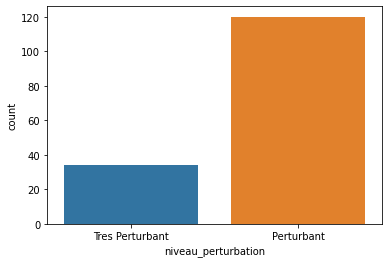

In [62]:
sns.countplot(x="niveau_perturbation", data=df_copy)
plt.xticks([0,1],['Tres Perturbant','Perturbant'])

plt.savefig('D:/- Mahdi -/INFOS YMB/Quantic Factory/Data Analyse/Quanticfy_Test/static/viz/niv_pert.png')

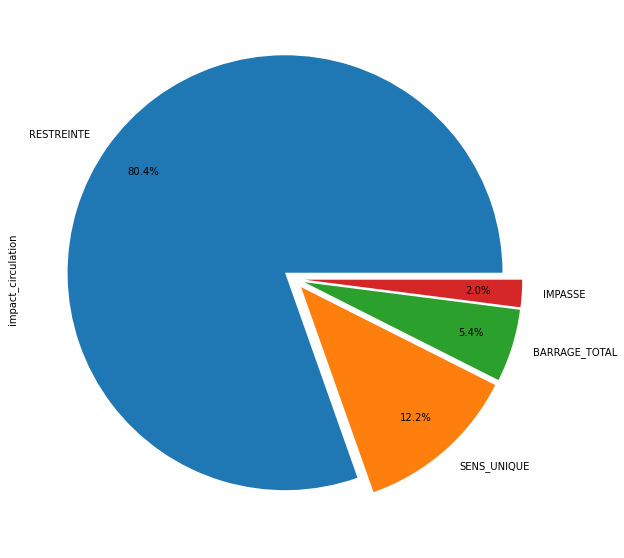

In [63]:
plt.figure(figsize=(10,10))
df['impact_circulation'].value_counts()[0:4].plot.pie(autopct="%.1f%%", explode=[0.05]*4,  pctdistance=0.8)
df['impact_circulation'].value_counts(normalize= True)
plt.savefig('D:/- Mahdi -/INFOS YMB/Quantic Factory/Data Analyse/Quanticfy_Test/static/viz/impact.png')

In [64]:

df_copy['typologie'].value_counts()


2.0    60
3.0    56
1.0    36
Name: typologie, dtype: int64

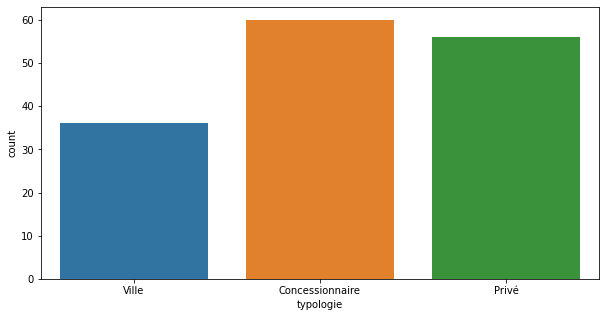

In [65]:
plt.figure(figsize=(10,5))
sns.countplot(x="typologie", data=df_copy)

plt.xticks([0,1,2],['Ville','Concessionnaire', 'Privé'])
plt.savefig('D:/- Mahdi -/INFOS YMB/Quantic Factory/Data Analyse/Quanticfy_Test/static/viz/typologie.png')

In [66]:
df_copy['objet'].value_counts()

REHABILITATION_IMMEUBLE           46
ENTRETIEN_RESEAU                  22
REAMENAGEMENT_VOIRIE              22
TRAVAUX_OUVRAGE                   21
CONSTRUCTION_IMMEUBLE             15
RACCORDEMENT_RESEAU               10
REFECTION_CHAUSSEE                 4
CREATION_RESEAUX                   4
TRAVAUX_URGENCE                    3
REAMENAGEMENT_SECTEUR              2
INSPECTION_SONDAGE_RESEAU          2
CREATION_ENTRETIEN_OUVRAGE_ART     2
TRAVAUX_TRAMWAY                    1
TRAVAUX_PREPARATOIRES              1
TRAVAUX_PARC_STATIONNEMENT         1
Name: objet, dtype: int64

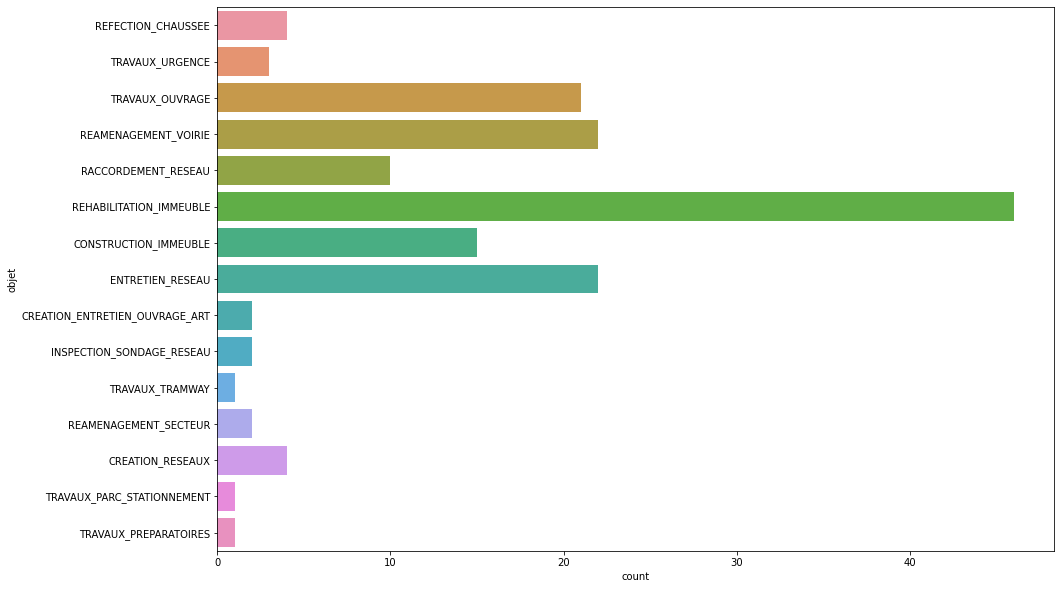

In [67]:
plt.figure(figsize=(15,10))
sns.countplot(y="objet", data=df_copy)
plt.savefig('D:/- Mahdi -/INFOS YMB/Quantic Factory/Data Analyse/Quanticfy_Test/static/viz/objet.png')

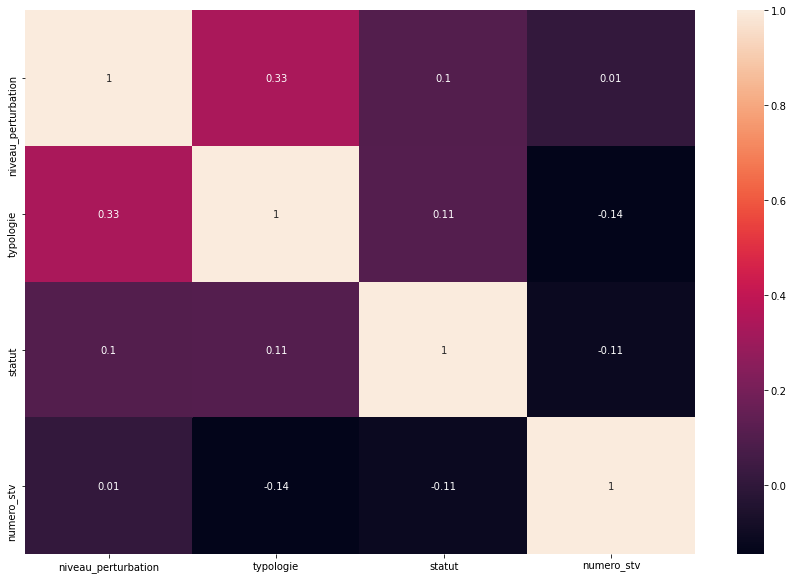

In [68]:
plt.figure(figsize=(15,10))
sns.heatmap(df_copy.corr(), annot=True)
plt.savefig('D:/- Mahdi -/INFOS YMB/Quantic Factory/Data Analyse/Quanticfy_Test/static/viz/correlation.png')

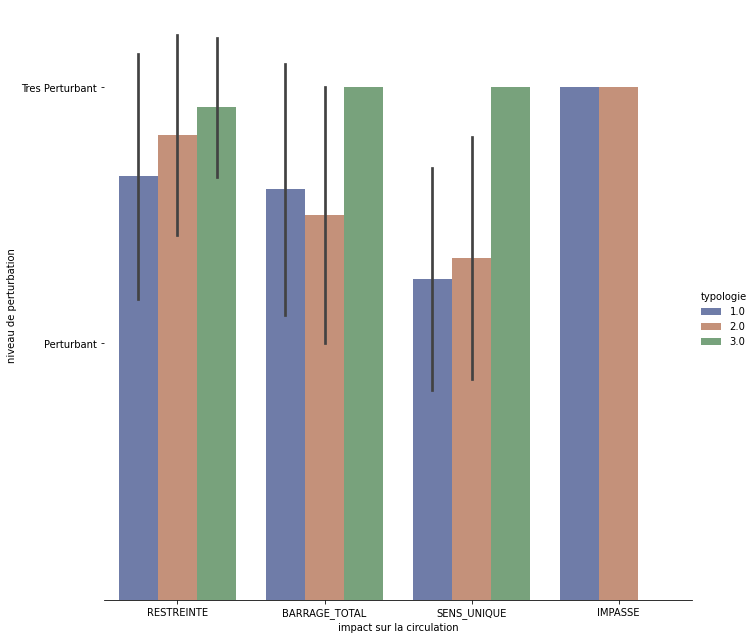

In [78]:

g = sns.catplot(
    data=df_copy, kind="bar",
    x="impact_circulation", y="niveau_perturbation", hue="typologie",
    ci="sd", palette="dark", alpha=.6, height=9, 
)
plt.yticks([2,1],['Tres Perturbant','Perturbant'])

g.despine(left=True)
g.set_axis_labels("impact sur la circulation", "niveau de perturbation ")
plt.savefig('D:/- Mahdi -/INFOS YMB/Quantic Factory/Data Analyse/Quanticfy_Test/static/viz/impact_niv_typo.png')

In [70]:
df_copy.describe()

,niveau_perturbation,typologie,statut,numero_stv
count,154.000000,152.000000,156.000000,155.000000
mean,1.779221,2.131579,2.057692,11.032258
std,0.416125,0.769314,0.457770,1.589002
min,1.000000,1.000000,1.000000,9.000000
25%,2.000000,2.000000,2.000000,9.500000
50%,2.000000,2.000000,2.000000,11.000000
75%,2.000000,3.000000,2.000000,12.000000
max,2.000000,3.000000,4.000000,15.000000


In [71]:
df_copy['impact_circulation'].unique()

array(['RESTREINTE', 'BARRAGE_TOTAL', 'SENS_UNIQUE', nan, 'IMPASSE'],
      dtype=object)

In [72]:
df_copy['impact_circulation'].describe()

count            148
unique             4
top       RESTREINTE
freq             119
Name: impact_circulation, dtype: object

In [73]:
df_copy['objet'].unique()

array(['REFECTION_CHAUSSEE', 'TRAVAUX_URGENCE', 'TRAVAUX_OUVRAGE',
       'REAMENAGEMENT_VOIRIE', 'RACCORDEMENT_RESEAU',
       'REHABILITATION_IMMEUBLE', 'CONSTRUCTION_IMMEUBLE',
       'ENTRETIEN_RESEAU', 'CREATION_ENTRETIEN_OUVRAGE_ART',
       'INSPECTION_SONDAGE_RESEAU', 'TRAVAUX_TRAMWAY',
       'REAMENAGEMENT_SECTEUR', 'CREATION_RESEAUX',
       'TRAVAUX_PARC_STATIONNEMENT', 'TRAVAUX_PREPARATOIRES'],
      dtype=object)

In [74]:
df_copy['objet'].describe()

count                         156
unique                         15
top       REHABILITATION_IMMEUBLE
freq                           46
Name: objet, dtype: object

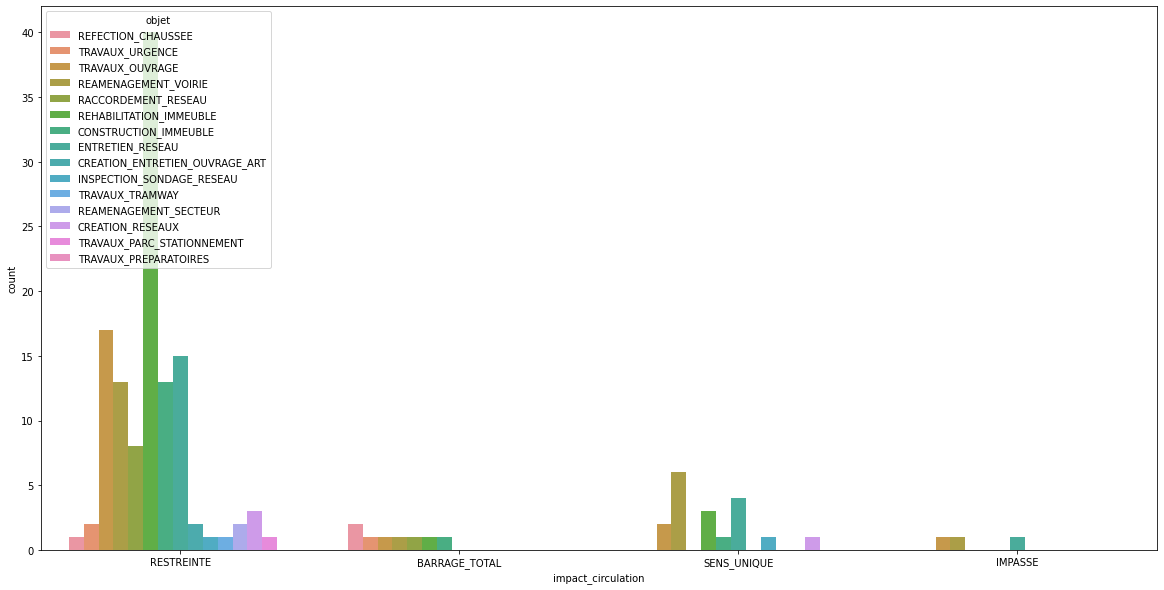

In [75]:
plt.figure(figsize=(20,10))
sns.countplot(x="impact_circulation", hue="objet" ,data=df_copy )
plt.savefig('D:/- Mahdi -/INFOS YMB/Quantic Factory/Data Analyse/Quanticfy_Test/static/viz/impact_objet.png')

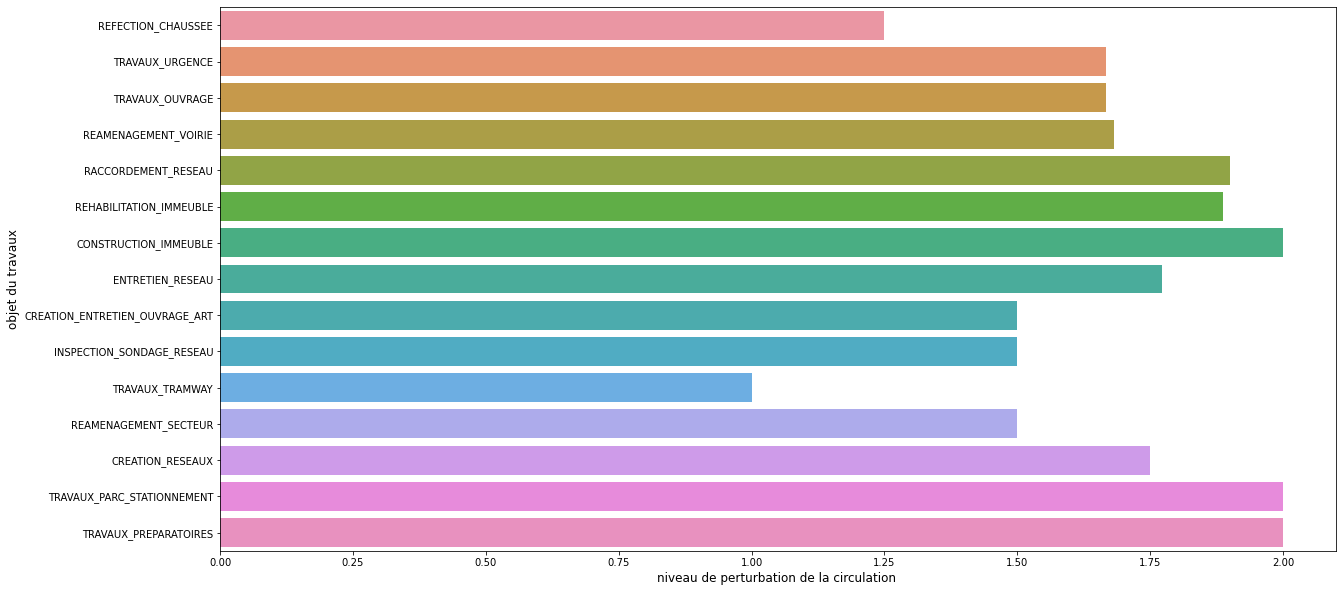

In [76]:

plt.figure(figsize=(20,10))

ax = sns.barplot(x = "niveau_perturbation", y = "objet", data = df, ci = None)

plt.xlabel("niveau de perturbation de la circulation ", fontsize= 12)
plt.ylabel("objet du travaux", fontsize= 12)


plt.savefig('D:/- Mahdi -/INFOS YMB/Quantic Factory/Data Analyse/Quanticfy_Test/static/viz/niv_objet.png')